# Code for running SiameseNet and TripletNet on BRACOL Dataset

***The code used in this notebook is mostly from [this](https://github.com/adambielski/siamese-triplet/). If you are interested in it, check it out, it is extremely well documented***

***Install libs***

In [1]:
import sys
sys.path.insert(0,'f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from models import EfficientNetB4
from losses import TripletLoss
from trainer import fit
import torchvision
import timm
from IPython.display import clear_output 
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE
from torch import nn
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score

# استفاده از مدل EfficientNet به جای MobileNetv2 برای استخراج ویژگی‌ها
embedding_net =EfficientNetB4() #timm.create_model('efficientnet_b0', pretrained=True)  # استفاده از مدل EfficientNet
siamese_model = TripletNet(embedding_net=embedding_net)

optimizer = torch.optim.Adam(siamese_model.parameters(), lr=1e-4)  # تغییر به Adam برای بهبود عملکرد
lr_scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)  # استفاده از Cosine Annealing برای تغییر نرخ یادگیری
loss_fn = TripletLoss(1.)
n_epochs = 100  # تعداد epochs
device = torch.cuda.is_available()

if device:
    siamese_model.cuda()

Loaded pretrained weights for efficientnet-b4


***Import some libs***

In [2]:
# بارگذاری داده‌ها
path_data = 'f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset_fiveshot'
triplet_train_loader = get_triplet_dataloader(root=path_data + '/train/', batch_size=5, transforms=get_train_transforms())
triplet_val_loader = get_triplet_dataloader(root=path_data + '/val/', batch_size=5, transforms=get_val_transforms())




***Define model hiperparams***

In [3]:

# آموزش مدل Siamese
fit(triplet_train_loader, triplet_val_loader, siamese_model, loss_fn, optimizer, lr_scheduler, n_epochs, device, log_interval=10)


Train: [0/75 (0%)]	Loss: 0.982148
Train: [50/75 (67%)]	Loss: 0.670786
Epoch: 1/100. Train set: Average loss: 0.6915
Epoch: 1/100. Validation set: Average loss: 0.7810
Estimated time of epoch: 56.07 s
ETA:93.45 min
Train: [0/75 (0%)]	Loss: 0.338913
Train: [50/75 (67%)]	Loss: 0.555555
Epoch: 2/100. Train set: Average loss: 0.5866
Epoch: 2/100. Validation set: Average loss: 0.7528
Estimated time of epoch: 49.61 s
ETA:81.86 min
Train: [0/75 (0%)]	Loss: 0.899265
Train: [50/75 (67%)]	Loss: 0.549543
Epoch: 3/100. Train set: Average loss: 0.5974
Epoch: 3/100. Validation set: Average loss: 0.7406
Estimated time of epoch: 49.25 s
ETA:80.44 min
Train: [0/75 (0%)]	Loss: 0.481390
Train: [50/75 (67%)]	Loss: 0.472930
Epoch: 4/100. Train set: Average loss: 0.4453
Epoch: 4/100. Validation set: Average loss: 0.6995
Estimated time of epoch: 50.13 s
ETA:81.04 min
Train: [0/75 (0%)]	Loss: 0.437242
Train: [50/75 (67%)]	Loss: 0.512464
Epoch: 5/100. Train set: Average loss: 0.4780
Epoch: 5/100. Validation set

Train: [50/75 (67%)]	Loss: 0.119539
Epoch: 39/100. Train set: Average loss: 0.1012
Epoch: 39/100. Validation set: Average loss: 0.4503
Estimated time of epoch: 49.4 s
ETA:51.05 min
Train: [0/75 (0%)]	Loss: 0.084453
Train: [50/75 (67%)]	Loss: 0.082401
Epoch: 40/100. Train set: Average loss: 0.0671
Epoch: 40/100. Validation set: Average loss: 0.4501
Estimated time of epoch: 48.87 s
ETA:49.68 min
Train: [0/75 (0%)]	Loss: 0.083982
Train: [50/75 (67%)]	Loss: 0.079287
Epoch: 41/100. Train set: Average loss: 0.0735
Epoch: 41/100. Validation set: Average loss: 0.4495
Estimated time of epoch: 48.44 s
ETA:48.44 min
Train: [0/75 (0%)]	Loss: 0.000000
Train: [50/75 (67%)]	Loss: 0.126830
Epoch: 42/100. Train set: Average loss: 0.1004
Epoch: 42/100. Validation set: Average loss: 0.4321
Estimated time of epoch: 49.25 s
ETA:48.43 min
Train: [0/75 (0%)]	Loss: 0.003989
Train: [50/75 (67%)]	Loss: 0.084206
Epoch: 43/100. Train set: Average loss: 0.1043
Epoch: 43/100. Validation set: Average loss: 0.4353
Es

Train: [50/75 (67%)]	Loss: 0.074675
Epoch: 77/100. Train set: Average loss: 0.0719
Epoch: 77/100. Validation set: Average loss: 0.3949
Estimated time of epoch: 48.85 s
ETA:19.54 min
Train: [0/75 (0%)]	Loss: 0.160201
Train: [50/75 (67%)]	Loss: 0.148848
Epoch: 78/100. Train set: Average loss: 0.1247
Epoch: 78/100. Validation set: Average loss: 0.3920
Estimated time of epoch: 48.85 s
ETA:18.73 min
Train: [0/75 (0%)]	Loss: 0.154707
Train: [50/75 (67%)]	Loss: 0.088086
Epoch: 79/100. Train set: Average loss: 0.0920
Epoch: 79/100. Validation set: Average loss: 0.4040
Estimated time of epoch: 49.18 s
ETA:18.03 min
Train: [0/75 (0%)]	Loss: 0.038150
Train: [50/75 (67%)]	Loss: 0.028447
Epoch: 80/100. Train set: Average loss: 0.0330
Epoch: 80/100. Validation set: Average loss: 0.3930
Estimated time of epoch: 49.16 s
ETA:17.21 min
Train: [0/75 (0%)]	Loss: 0.120976
Train: [50/75 (67%)]	Loss: 0.057022
Epoch: 81/100. Train set: Average loss: 0.0640
Epoch: 81/100. Validation set: Average loss: 0.4094
E

Epoch [1/1000], Loss: 2.7064
Epoch [2/1000], Loss: 2.7021
Epoch [3/1000], Loss: 2.7005
Epoch [4/1000], Loss: 2.6974
Epoch [5/1000], Loss: 2.6969
Epoch [6/1000], Loss: 2.6930
Epoch [7/1000], Loss: 2.6917
Epoch [8/1000], Loss: 2.6879
Epoch [9/1000], Loss: 2.6887
Epoch [10/1000], Loss: 2.6860
Epoch [11/1000], Loss: 2.6817
Epoch [12/1000], Loss: 2.6786
Epoch [13/1000], Loss: 2.6764
Epoch [14/1000], Loss: 2.6743
Epoch [15/1000], Loss: 2.6743
Epoch [16/1000], Loss: 2.6706
Epoch [17/1000], Loss: 2.6701
Epoch [18/1000], Loss: 2.6659
Epoch [19/1000], Loss: 2.6653
Epoch [20/1000], Loss: 2.6627
Epoch [21/1000], Loss: 2.6602
Epoch [22/1000], Loss: 2.6555
Epoch [23/1000], Loss: 2.6589
Epoch [24/1000], Loss: 2.6548
Epoch [25/1000], Loss: 2.6507
Epoch [26/1000], Loss: 2.6468
Epoch [27/1000], Loss: 2.6469
Epoch [28/1000], Loss: 2.6446
Epoch [29/1000], Loss: 2.6386
Epoch [30/1000], Loss: 2.6395
Epoch [31/1000], Loss: 2.6367
Epoch [32/1000], Loss: 2.6342
Epoch [33/1000], Loss: 2.6315
Epoch [34/1000], Lo

Epoch [342/1000], Loss: 1.9885
Epoch [343/1000], Loss: 1.9885
Epoch [344/1000], Loss: 1.9846
Epoch [345/1000], Loss: 1.9722
Epoch [346/1000], Loss: 1.9742
Epoch [347/1000], Loss: 1.9786
Epoch [348/1000], Loss: 1.9729
Epoch [349/1000], Loss: 1.9773
Epoch [350/1000], Loss: 1.9757
Epoch [351/1000], Loss: 1.9788
Epoch [352/1000], Loss: 1.9659
Epoch [353/1000], Loss: 1.9652
Epoch [354/1000], Loss: 1.9607
Epoch [355/1000], Loss: 1.9696
Epoch [356/1000], Loss: 1.9631
Epoch [357/1000], Loss: 1.9541
Epoch [358/1000], Loss: 1.9501
Epoch [359/1000], Loss: 1.9591
Epoch [360/1000], Loss: 1.9525
Epoch [361/1000], Loss: 1.9470
Epoch [362/1000], Loss: 1.9541
Epoch [363/1000], Loss: 1.9463
Epoch [364/1000], Loss: 1.9476
Epoch [365/1000], Loss: 1.9442
Epoch [366/1000], Loss: 1.9440
Epoch [367/1000], Loss: 1.9378
Epoch [368/1000], Loss: 1.9366
Epoch [369/1000], Loss: 1.9360
Epoch [370/1000], Loss: 1.9296
Epoch [371/1000], Loss: 1.9344
Epoch [372/1000], Loss: 1.9336
Epoch [373/1000], Loss: 1.9255
Epoch [3

Epoch [720/1000], Loss: 1.3454
Epoch [721/1000], Loss: 1.3442
Epoch [722/1000], Loss: 1.3287
Epoch [723/1000], Loss: 1.3388
Epoch [724/1000], Loss: 1.3535
Epoch [725/1000], Loss: 1.3427
Epoch [726/1000], Loss: 1.3338
Epoch [727/1000], Loss: 1.3410
Epoch [728/1000], Loss: 1.3308
Epoch [729/1000], Loss: 1.3285
Epoch [730/1000], Loss: 1.3373
Epoch [731/1000], Loss: 1.3253
Epoch [732/1000], Loss: 1.3352
Epoch [733/1000], Loss: 1.3300
Epoch [734/1000], Loss: 1.3123
Epoch [735/1000], Loss: 1.3174
Epoch [736/1000], Loss: 1.3246
Epoch [737/1000], Loss: 1.3211
Epoch [738/1000], Loss: 1.3187
Epoch [739/1000], Loss: 1.3178
Epoch [740/1000], Loss: 1.3158
Epoch [741/1000], Loss: 1.3147
Epoch [742/1000], Loss: 1.3174
Epoch [743/1000], Loss: 1.3118
Epoch [744/1000], Loss: 1.3004
Epoch [745/1000], Loss: 1.3012
Epoch [746/1000], Loss: 1.3185
Epoch [747/1000], Loss: 1.3066
Epoch [748/1000], Loss: 1.3085
Epoch [749/1000], Loss: 1.3063
Epoch [750/1000], Loss: 1.3043
Epoch [751/1000], Loss: 1.3151
Epoch [7

IndexError: list index out of range

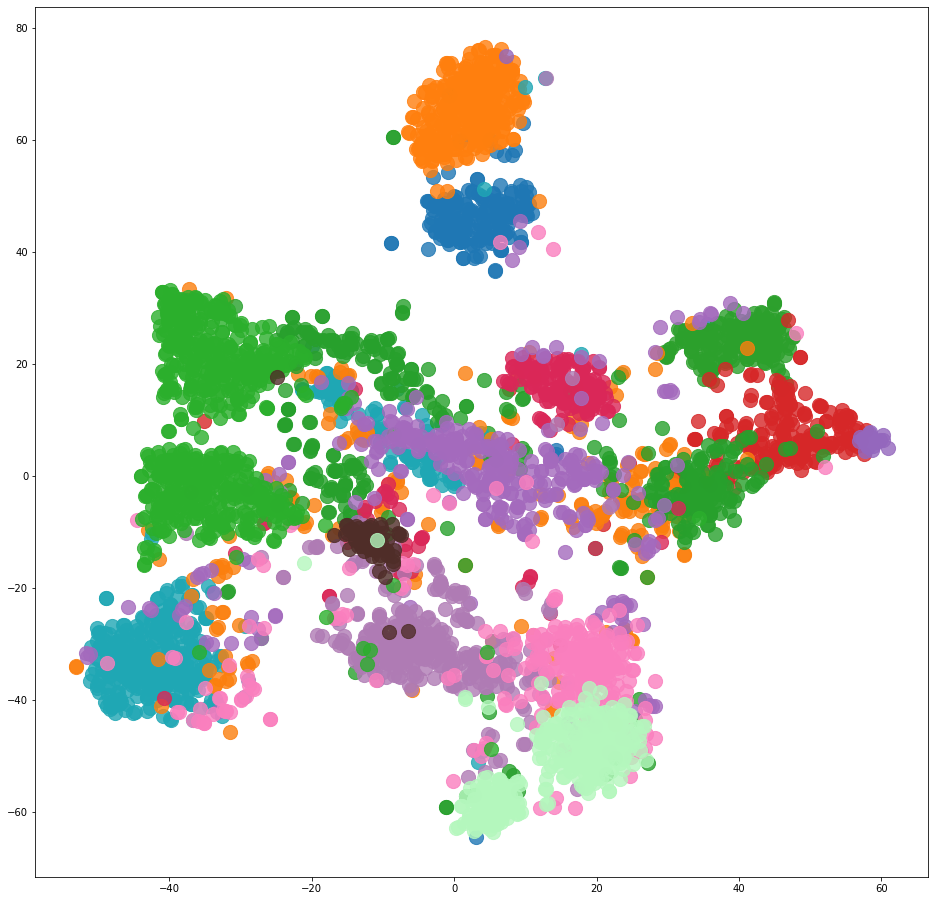

In [4]:
import cv2
import numpy as np
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
from torch.autograd import Variable
import os
import pandas as pd
import seaborn as sns
# استخراج ویژگی‌ها با استفاده از مدل Siamese
#def generate_embeddings(data_loader, model):
#    with torch.no_grad():
#        #device = 'cuda'
#        model.eval()
#        #model.to(device)
#        labels = None
#        embeddings = None
#        for batch_idx, data in tqdm(enumerate(data_loader)):
#            batch_imgs, batch_labels = data
#            batch_labels = batch_labels.numpy()
#           # batch_imgs = Variable(batch_imgs.to('cuda'))
#            batch_E = model.get_embedding(batch_imgs)
#            batch_E = batch_E.data.cpu().numpy()
#            embeddings = np.concatenate((embeddings, batch_E), axis=0) if embeddings is not None else batch_E
#            labels = np.concatenate((labels, batch_labels), axis=0) if labels is not None else batch_labels
#    return embeddings, labels
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        #device = 'cuda'
        model.eval()
        #model.to(device)
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

def vis_tSNE(embeddings, labels, backbone='Convnet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(16):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    # plt.title(f't-SNE', fontweight='bold', fontsize=24)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')
    
# تعریف مدل سفارشی ViT
 
class CustomViT(nn.Module):
    def __init__(self, original_vit_model, embedding_dim, num_classes):
        super(CustomViT, self).__init__()
        # حذف لایه‌های ابتدایی
        self.vit = nn.Sequential(*list(original_vit_model.children())[2:])  # لایه‌های ابتدایی حذف شده
        #self.fc = nn.Linear(embedding_dim, num_classes)  # لایه نهایی برای طبقه‌بندی
        #self.fc = nn.Linear(1280, num_classes)  # لایه نهایی برای طبقه‌بندی
        self.fc = nn.Linear(1792, num_classes)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        x = self.vit(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x    

train_data = torchvision.datasets.ImageFolder(root=path_data + '/train/', transform=get_val_transforms())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

# بارگذاری مدل ViT از Hugging Face
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
vit_model.classifier = torch.nn.Linear(vit_model.config.hidden_size, 15)  # تعداد کلاس‌ها

embedding_dim = vit_model.config.hidden_size  # ابعاد embedding
model = CustomViT(vit_model, embedding_dim, num_classes=15)

# استخراج ویژگی‌ها از داده‌های آموزش
train_embeddings, train_labels = generate_embeddings(train_loader, siamese_model )
# استخراج ویژگی‌ها از داده‌های تست
test_embeddings, test_labels = generate_embeddings(test_loader, siamese_model )
 
# تبدیل داده‌ها به تنسور
X_train, y_train = train_embeddings, train_labels
X_val, y_val = test_embeddings, test_labels

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# انتقال مدل به دستگاه CUDA
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if torch.cuda.is_available():
    model.cuda()

# تنظیمات loss function و optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)  # استفاده از AdamW

# آموزش مدل
model.train()
for epoch in range(1000):  # تعداد epochs
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device))
    loss = criterion(outputs, y_train_tensor.to(device))
    loss.backward()
    optimizer.step()
    lr_scheduler.step()  # اعمال تغییرات در نرخ یادگیری
    print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# ارزیابی مدل
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor.to(device))
    _, predicted = torch.max(val_outputs.data, 1)

# محاسبه دقت و امتیاز F1
accuracy = accuracy_score(y_val_tensor.cpu(), predicted.cpu())
f1 = f1_score(y_val_tensor.cpu(), predicted.cpu(), average='weighted')
precision = precision_score(y_val_tensor.cpu(), predicted.cpu(), average='macro') 
recall = recall_score(y_val_tensor.cpu(), predicted.cpu(), average='macro')

# نمایش نتایج
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')

# ذخیره مدل
torch.save(model.state_dict(), "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siameseNFnet_improved.h5")
torch.save(model, "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siameseNFnet_improved_Model.h5")

# تابع تولید Embedding‌ها
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        model.eval()
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)  # استخراج ویژگی‌ها
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

# تابع vis_tSNE برای نمایش ویژگی‌ها
def vis_tSNE(embeddings, labels, backbone='EfficientNet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(16):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')

# نمایش t-SNE برای داده‌های تست
test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, siamese_model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

# نتیجه نهایی
print("Model training and evaluation completed.")